In [2]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Load the data set into the environment
df = pd.read_csv('/content/drive/MyDrive/brainstroke_analysis/train_set.csv')
# The first 5 instances of the dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
#Total value counts of the attributes
df.value_counts()

id     gender  age   hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
1      Female  80.0  0             1              Yes           Self-employed  Urban           67.45              25.6  never smoked     0         1
49352  Female  65.0  0             0              Yes           Private        Urban           164.52             32.4  never smoked     0         1
49421  Female  66.0  1             0              Yes           Private        Rural           205.23             39.5  never smoked     0         1
49420  Female  78.0  1             0              Yes           Self-employed  Rural           247.98             27.1  smokes           0         1
49418  Male    37.0  0             0              No            Private        Rural           75.29              27.4  never smoked     0         1
                                                                                                               

In [6]:
#Information of dataset such as datatypes,range
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


**Find the number of NULL values in each column**

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


<Axes: >

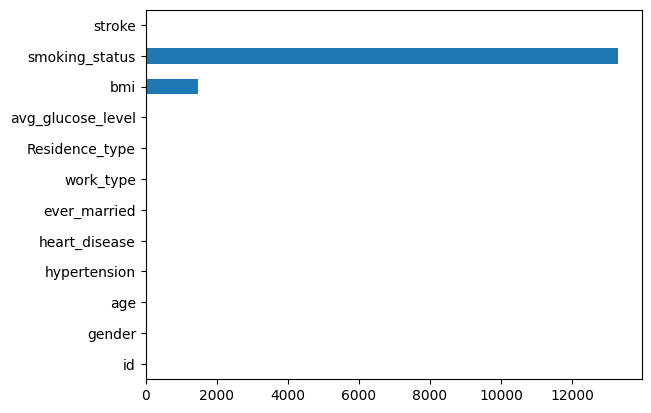

In [8]:
# Printing  and graphical representation of the number of Null values values in each column
print(df.isna().sum())
df.isna().sum().plot.barh()






*   Found 1462 Null values in BMI
*   Found 13292 Null values in smoking status



**PRE PROCESSING + EDA**

In [9]:
# The 'id' column is dropped since the attribute holds no significant importance to the problem at hand
df = df.drop(['id'],axis=1)

In [10]:
#Value count of male and female(Gender analysis))
df.value_counts('gender')

gender
Female    25665
Male      17724
Other        11
dtype: int64

We have a 'other' gender and since there is only 11 instance we will remove it as to reduce the dimension of age

<Axes: ylabel='gender'>

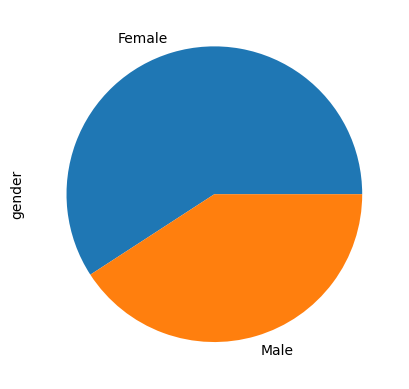

In [11]:
# Removing the 'other' gender instance inorder to reduce the dimension
df['gender'] = df['gender'].replace('Other','Female')
# plotting a pie chart to see the gender count distribution
df['gender'].value_counts().plot(kind="pie")

* There are more females as compared to males









# **Target feature - Stroke**

* Stroke analysis

In [12]:
# Value count in the stroke attribute
df['stroke'].value_counts()

0    42617
1      783
Name: stroke, dtype: int64

<Axes: >

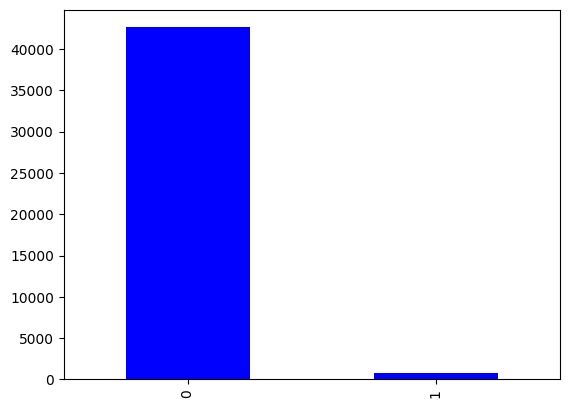

In [13]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "blue")

In [14]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  1.7999999999999998


**Work type Analysis**

Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: work_type, dtype: int64


<Axes: ylabel='work_type'>

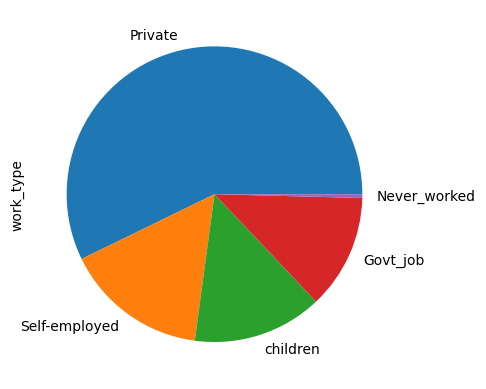

In [15]:
# Value of count of work-type attribute
print(df['work_type'].value_counts())
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

**Smoking status Analysis**

In [16]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

<Axes: ylabel='smoking_status'>

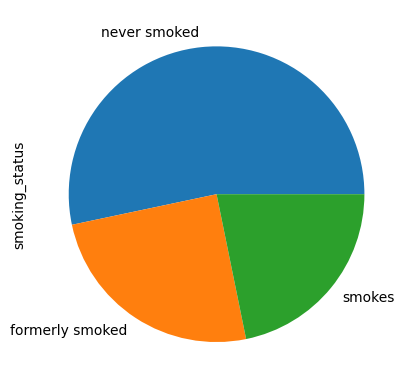

In [17]:
# Graphical representation of the value counts of the smoking staus attribute
df['smoking_status'].value_counts().plot(kind="pie")

**Residence type Analysis**

In [18]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

<Axes: ylabel='Residence_type'>

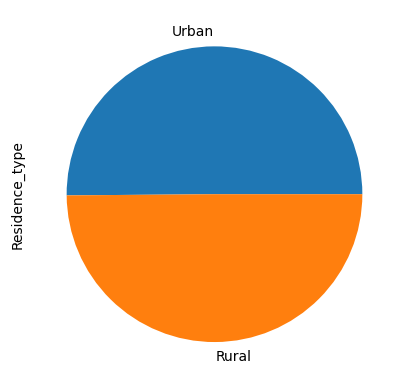

In [19]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

* We have some what  equal percentage of population who are from Urban and rural areas

**BMI analysis**

In [20]:
# Number of BMI - NULL values
df['bmi'].isnull().sum()

1462

* We only have N/A values in bmi column - 201 Null values

<Axes: xlabel='bmi', ylabel='Count'>

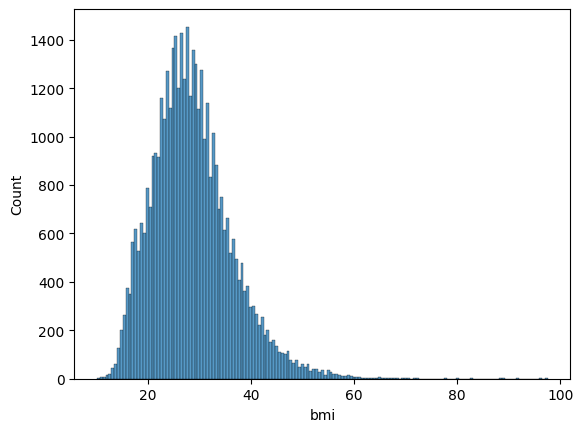

In [21]:
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

* Bmi is rightly skewed

<Axes: ylabel='bmi'>

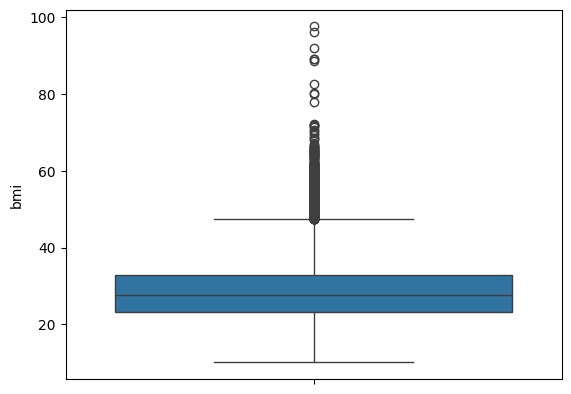

In [22]:
sns.boxplot(data=df['bmi'])

* Based on the histogram and boxplot we see that there are many outliers in bmi

In [23]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    42512
True       888
Name: bmi, dtype: int64

* Total outliers in bmi:888
* Total non-outliers in bmi:42512

In [24]:
# Percentage of NULL values in bmi
df['bmi'].isna().sum()/len(df['bmi'])*100

3.3686635944700463

* NULL values hold 3.37 % of the instances in the dataframe

In [25]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 140
People who got stroke and their BMI is given: 783
percentage of people with stroke in Nan values to the overall dataset: 17.879948914431672


In [26]:
# Percentage of instances who got stroke
df['stroke'].sum()/len(df)*100

1.804147465437788

* Our main target function is stroke And the instances who got a stroke is in the minority - 783 Which is only 1.8 % of the instances

In [27]:
# Analysing whether to drop NA values in Bmi column
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

Nan BMI values where people have stroke: 140
overall BMI values where people have stroke: 783


* Among the 1462 bmi NULL values 140 values in them got stroke
* Thus we cant drop NULL values

* Since there are outliers present we can’t perform mean imputation as mean is affected by the outliers
* Hence we impute it with median values

In [28]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 27.7


**AGE analysis**

<Axes: xlabel='age', ylabel='Count'>

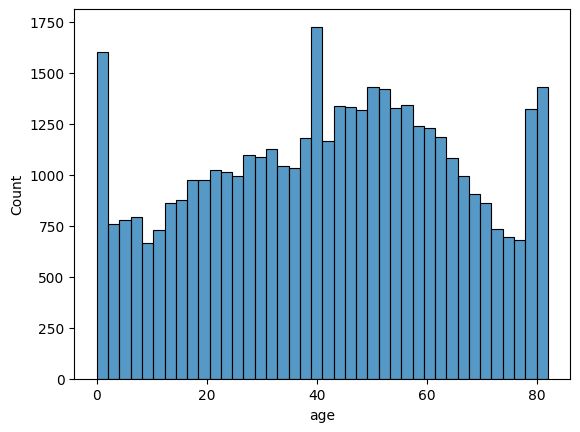

In [29]:
# Graphical representation fo the data in age column
# histogram
sns.histplot(data=df['age'])

<Axes: ylabel='age'>

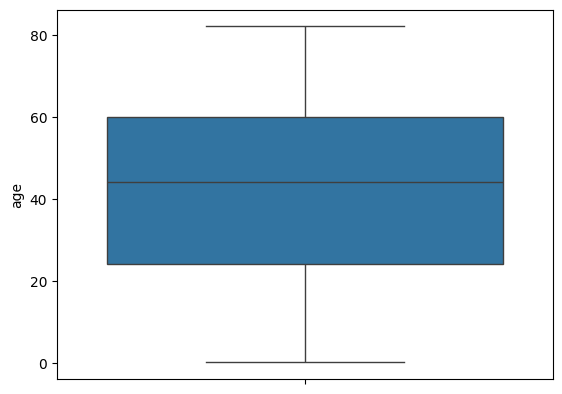

In [30]:

# boxplot
sns.boxplot(data=df['age'])

* The age parameter values does not have any outliers
* And has a normal distribution

**AVERAGE GLUCOSE LEVEL ANALYSIS**

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

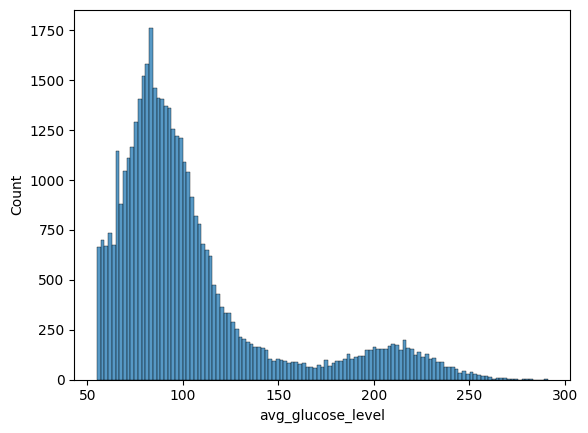

In [31]:
# Graphical representation fo the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

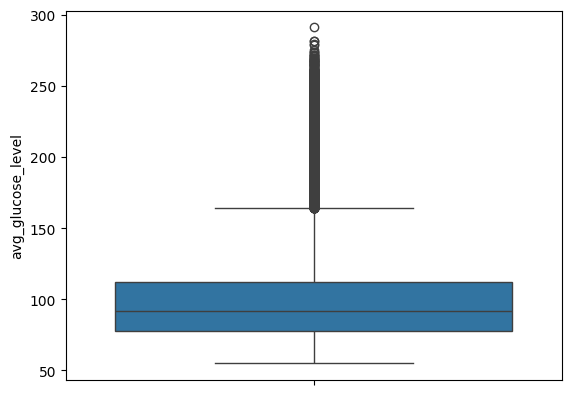

In [32]:
# Boxplot
sns.boxplot(data=df['avg_glucose_level'])

* There are many outliers present based on the boxplot and histogram
* The data is positively skewed

In [33]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

False    38422
True      4978
Name: avg_glucose_level, dtype: int64

* Total outliers in avg_glucose_level : 4978
* Total non-outliers in avg_glucose_level : 38422

<Axes: >

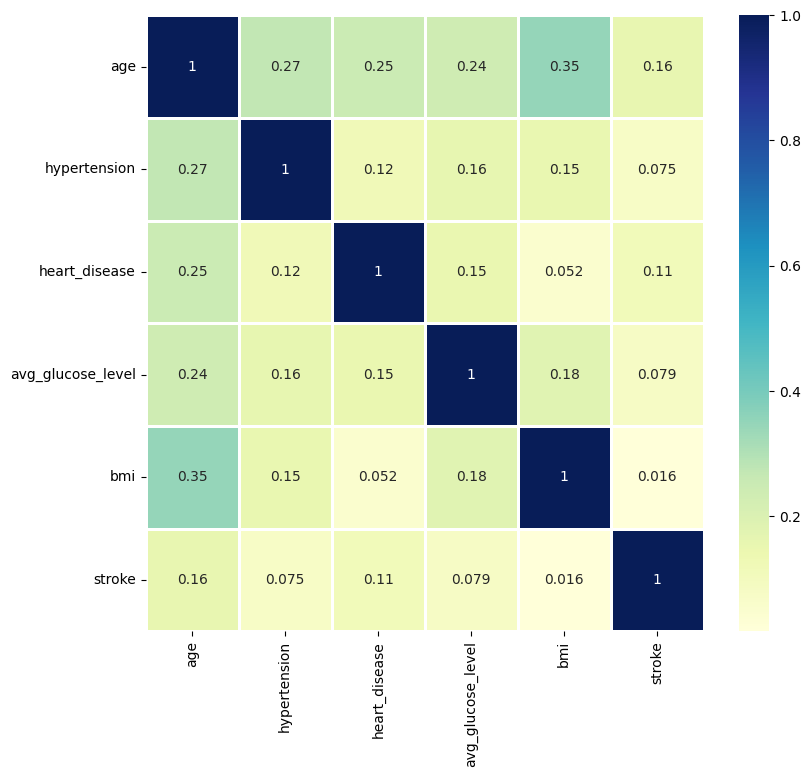

In [34]:
# Correlation matrix between the attributes in the dataset to find if any attributes are correlated
corrmat=df.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidth=0.8,annot=True)

* There is a weak correlation between the attributes as per the plotted heatmap
* The highest correlation found was between age and bmi - 0.35
* Rest all correlations were less than 0.35
* We could not drw any statistical insight from heatmap

**Heart_disease analysis**

In [35]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()

0    41338
1     2062
Name: heart_disease, dtype: int64

* This data reflects that around 95.25 % of the total population or list of people are free from Heart_disease and only 4.75 % are having heart_disease.

<Axes: ylabel='heart_disease'>

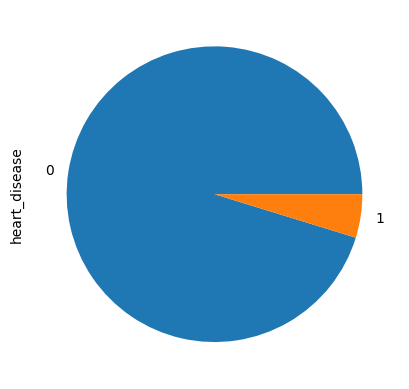

In [36]:
df['heart_disease'].value_counts().plot(kind="pie")

**Ever_married analysis with Values**

In [37]:
# Value count of evver married attribute
df['ever_married'].value_counts()

Yes    27938
No     15462
Name: ever_married, dtype: int64

* This result shows that 63.4 % of people from the list are married and 36.6 % are unmarried.

<Axes: ylabel='ever_married'>

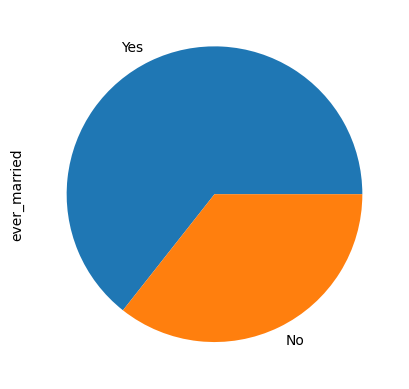

In [38]:
# Graphical representation
df['ever_married'].value_counts().plot(kind="pie")

# **Cross analysis - all the attribute compared with target attibute**

<Axes: xlabel='stroke', ylabel='count'>

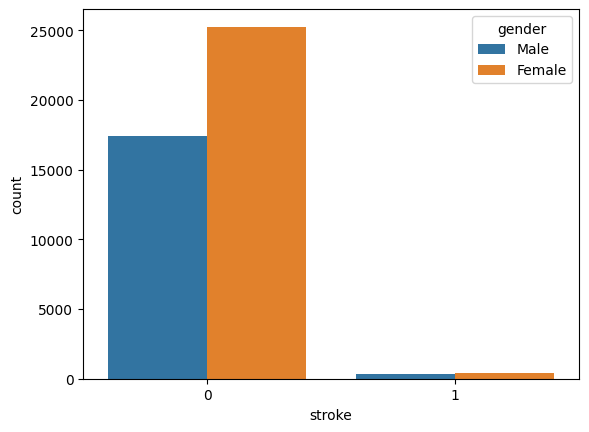

In [39]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

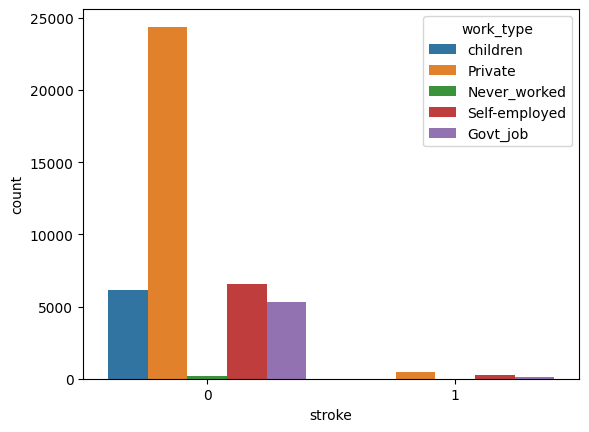

In [40]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

* Based on this comparison we see in the provided dataset that people who never worked never got a heart attack and the people who are privetly employed and self employed got more strokes

<Axes: xlabel='stroke', ylabel='count'>

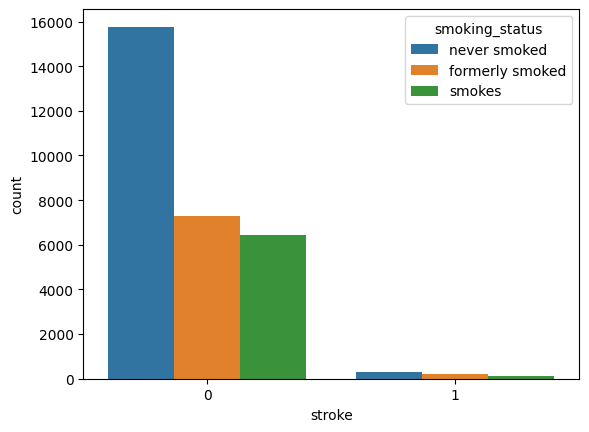

In [41]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

* Based on the plot we can that those who formerly smoked got more strokes The people who smoked and never smoked has a somewhat same probability of getting stroke

<Axes: xlabel='stroke', ylabel='count'>

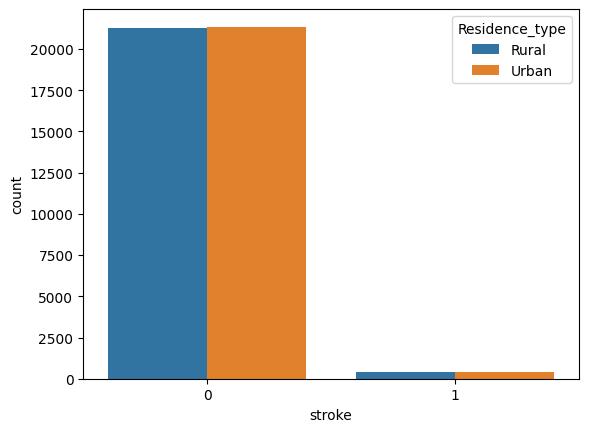

In [42]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

* Based on the analysis the people people who live in both Urban and rural  areas have reported with equal chances of stroke

<Axes: xlabel='stroke', ylabel='count'>

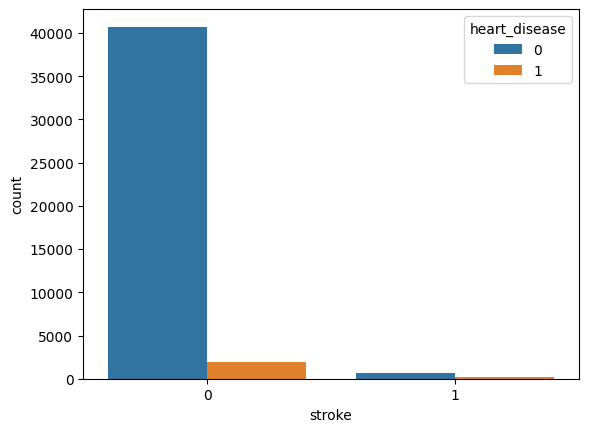

In [43]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

* This plotting shows that the number of "people with Strokes but no heart disease" is approximately 6 to 8 times the number of "people with Strokes and also heart disease". This shows most of the people with no heart disease are suffering with Strokes compared to the once who have Heart Disease.

<Axes: xlabel='stroke', ylabel='count'>

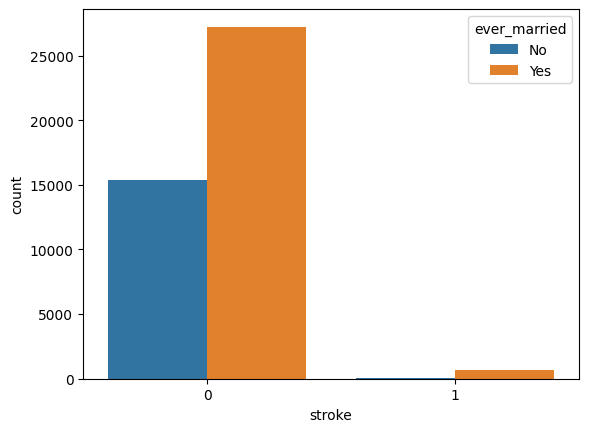

In [44]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

* This plotting shows that the number of "Married people with Strokes" is approximately 5 to 6 times the no. "Unmarried people with Strokes".
* This shows most of the Married people got Strokes compared to Unmarried people.

**Creating dummy variables for numeric-binary attributes**

In [45]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke','smoking_status']] = df[['hypertension', 'heart_disease', 'stroke','smoking_status']].astype(str)
# Generating dummy attributes - one hot encoding format
dummy = pd.get_dummies(df, drop_first= True)

In [46]:

# The data frame after performing dummy attributes
dummy.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_nan,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,3.0,95.12,18.0,1,0,0,0,0,0,0,1,0,1,0,0,0
1,58.0,87.96,39.2,1,1,0,1,0,1,0,0,1,0,1,0,0
2,8.0,110.89,17.6,0,0,0,0,0,1,0,0,1,1,0,0,0
3,70.0,69.04,35.9,0,0,0,1,0,1,0,0,0,0,0,0,0
4,14.0,161.28,19.1,1,0,0,0,1,0,0,0,0,1,0,0,0


In [47]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=dummy.drop(['stroke_1'],axis=1)
y=dummy['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [48]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
dummy[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

*
Scaling the numeric values for bringing them all to the same scale

**Creating test-train split (80-20 split)**

In [49]:
'''from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(dummy.loc[:,dummy.columns!='stroke_1'], dummy['stroke_1'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))'''


'from imblearn.over_sampling import SMOTE\nsmote = SMOTE(sampling_strategy=\'minority\')\n\n# fit the object to our training data\nX, y = smote.fit_resample(dummy.loc[:,dummy.columns!=\'stroke_1\'], dummy[\'stroke_1\'])\nprint("Shape of X: {}".format(X.shape))\nprint("Shape of y: {}".format(y.shape))'

In [50]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
#X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [51]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (68187, 15)
y_train: (68187,)
X_test: (17047, 15)
y_test: (17047,)


# **Training Model**

**Decision Tree**

Accuracy: 0.9897929254414266
Precision: 0.9800481596147231
Recall: 1.0
F1 Score: 0.9899235580264072
MCC: 0.9797887513584203
FPR: [0.         0.02047059 1.        ]
FNR: 0.0
NLR: 0.0
Confusion Matrix:
 [[8326  174]
 [   0 8547]]


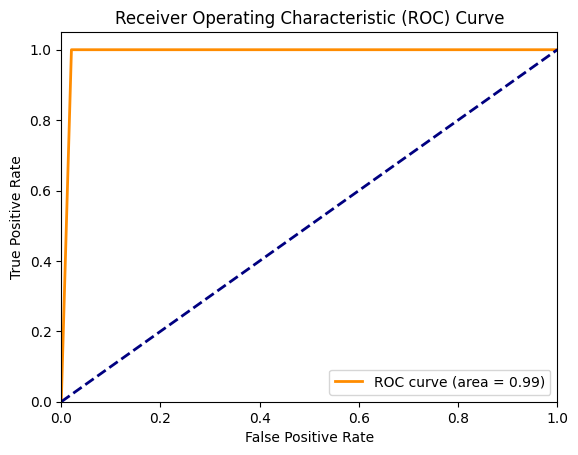

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef, roc_curve, auc
import matplotlib.pyplot as plt

# Create the classifier object
clf = DecisionTreeClassifier()

# Training the classifier
clf.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, y_pred)

# Calculate False Positive Rate (FPR), False Negative Rate (FNR), and Negative Likelihood Ratio (NLR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
nlr = fnr / (1 - fpr)

# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR:', nlr)
print('Confusion Matrix:\n', conf_matrix)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


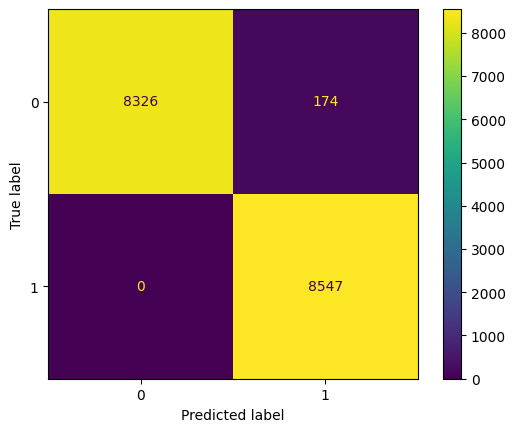

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()


**KNN**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, matthews_corrcoef

# Create the classifier object
knn = KNeighborsClassifier(n_neighbors=2)

# Training the classifier
knn.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_prob_knn)
mcc = matthews_corrcoef(y_test, y_pred_knn)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (fp / tp) * 100

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.9903208775737666
Precision: 0.9810606060606061
Recall: 1.0
F1 Score: 0.9904397705544934
MCC: 0.9808243922402966
FPR: 0.019411764705882354
FNR: 0.0
NLR (%): 0.0
PLR (%): 1.9305019305019304
Confusion Matrix:
 [[8335  165]
 [   0 8547]]


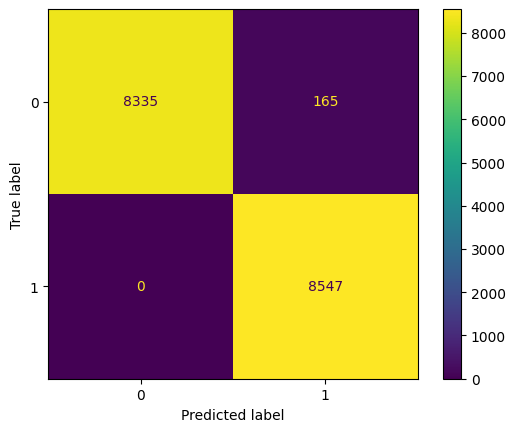

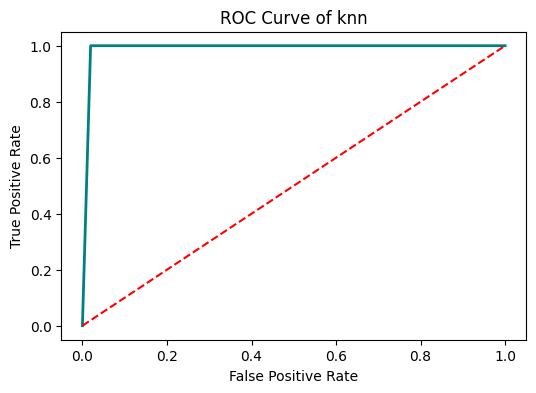

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()


# plots of roc_auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of knn')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()



**XGBoost**

Accuracy: 0.9634539801724643
Precision: 0.9320610687022901
Recall: 1.0
F1 Score: 0.9648360331884631
MCC: 0.9293796183899135
FPR: 0.07329411764705883
FNR: 0.0
NLR (%): 0.0
PLR (%): 1371.9101123595506
Confusion Matrix:
 [[7877  623]
 [   0 8547]]


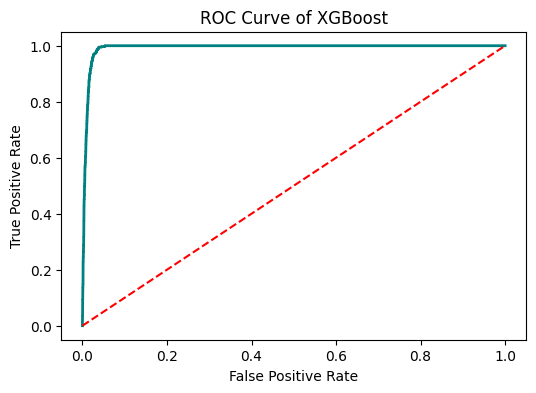

In [56]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef

# Create the classifier object
xgb = XGBClassifier()

# Training the classifier
xgb.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
mcc = matthews_corrcoef(y_test, y_pred_xgb)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)
print('Confusion Matrix:\n', conf_matrix)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


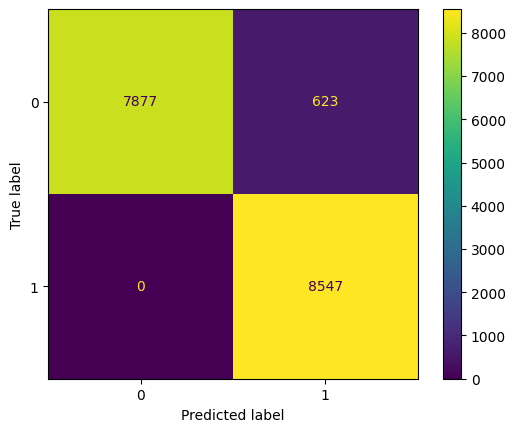

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb.classes_)
disp.plot()
plt.show()


In [58]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

Accuracy_score: 0.9634539801724643
Precision_score: 0.9320610687022901
Recall_score: 1.0
f1_score: 0.9648360331884631
ROC AUC Score: 0.9921568214509391


**Random Forest**

Accuracy: 0.9985334662990556
Precision: 0.9970835277648157
Recall: 1.0
F1 Score: 0.9985396343244348
MCC: 0.9970711755706022
FPR: 0.0029411764705882353
FNR: 0.0
NLR (%): 0.0
PLR (%): 34188.0
Confusion Matrix:
 [[8475   25]
 [   0 8547]]


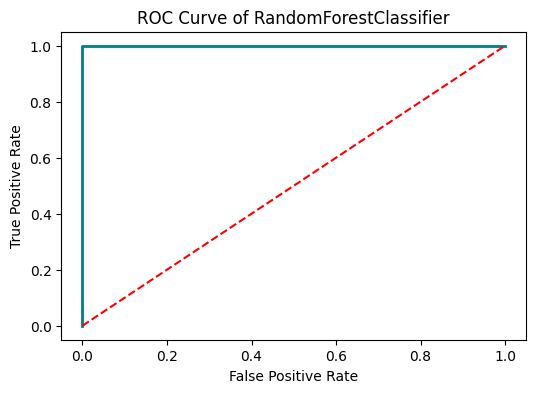

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef

# Create the classifier object
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
rf_clf.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_rf = rf_clf.predict(X_test)
y_pred_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
mcc = matthews_corrcoef(y_test, y_pred_rf)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)
print('Confusion Matrix:\n', conf_matrix)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [60]:
# Importing module for kfold cross validation
from sklearn import model_selection
from sklearn.model_selection import KFold

# Performing k fold cross validation using 20 splits
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(rf_clf, X, y, cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)
print(results_kfold)

Accuracy:  98.17511520737327
[0.97788018 0.98018433 0.9797235  0.98525346 0.98018433 0.97741935
 0.98202765 0.98341014 0.98894009 0.9797235  0.98387097 0.9843318
 0.98294931 0.98294931 0.97926267 0.98064516 0.98110599 0.98202765
 0.98248848 0.98064516]


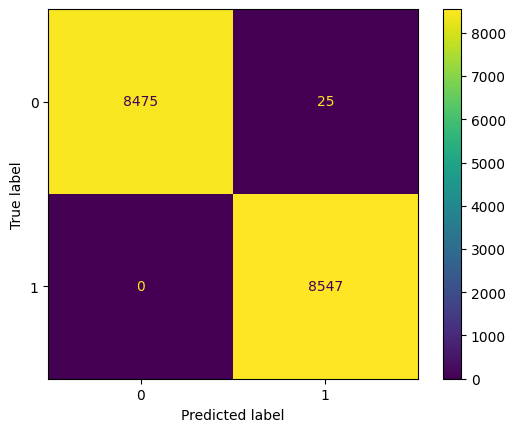

In [61]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
plt.show()


**Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef

# Create the logistic regression classifier object
classifier = LogisticRegression(random_state=0)

# Train the model using the training sets
classifier.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred_lr = classifier.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
mcc = matthews_corrcoef(y_test, y_pred_lr)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR)
nlr = fnr / (1 - fpr)

# Calculate Positive Likelihood Ratio (PLR)
plr = tp / fp

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR:', nlr)
print('PLR:', plr)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.7777321522848595
Precision: 0.7589246843709185
Recall: 0.8158418158418158
F1 Score: 0.7863546659148576
MCC: 0.5569465845033067
FPR: 0.2605882352941176
FNR: 0.18415818415818416
NLR: 0.24906039225848292
PLR: 3.148081264108352
Confusion Matrix:
 [[6285 2215]
 [1574 6973]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC (ROC value): 0.8501743439390498


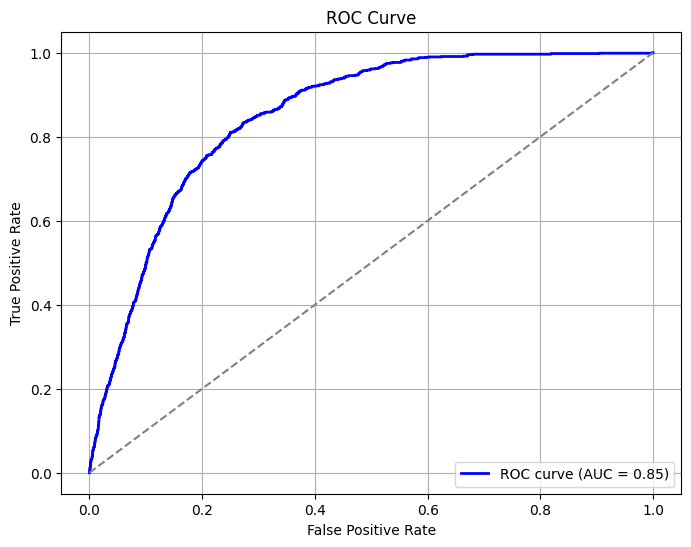

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate predicted probabilities
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)
print('AUC (ROC value):', roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


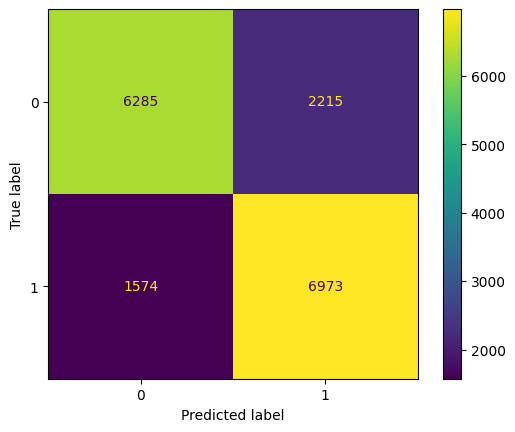

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()



In [65]:
# Making sample predictions based on manual value entry
age=67
avg_glucose_level=228.69
bmi=36.6
gender_Male=1
ever_married_Yes=1
work_type_Never_worked=0
work_type_Private=1
work_type_Self_employed=0
work_type_children=0
Residence_type_Urban=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=0
heart_disease_1=1
smoking_status_nan=0


input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban, smoking_status_nan, smoking_status_never_smoked,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban','smoking_status_nan','smoking_status_never smoked'	, 'smoking_status_smokes']

df_new = pd.DataFrame(features_value, columns=features_name)
prediction = rf_clf.predict(df_new)[0]
print(prediction)

1


**Naive Bayes**

Accuracy: 0.6737255822138792
Precision: 0.6076917526517065
Recall: 0.9853749853749854
F1 Score: 0.7517629206462555
MCC: 0.44332852167174747
FPR: 0.6396470588235295
FNR: 0.014625014625014626
NLR (%): 4.058525116311601
PLR (%): 154.90160014713996
Confusion Matrix:
 [[3063 5437]
 [ 125 8422]]


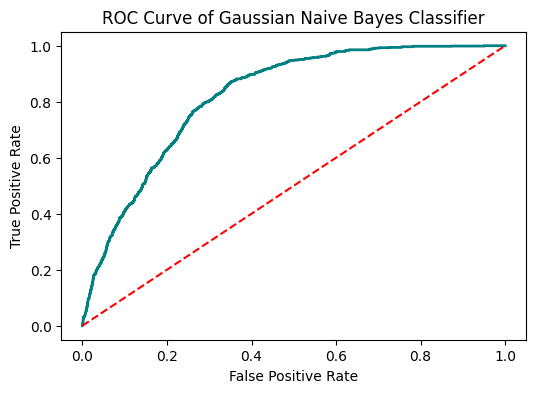

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef

# Create the Naive Bayes classifier object
nb_clf = GaussianNB()

# Train the model using the training sets
nb_clf.fit(X_train, y_train)

# Perform predictions on the test dataset
y_pred_nb = nb_clf.predict(X_test)
y_pred_prob_nb = nb_clf.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
mcc = matthews_corrcoef(y_test, y_pred_nb)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)
print('Confusion Matrix:\n', conf_matrix)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, linewidth=2, color='teal')
plt.plot([0, 1], [0, 1], 'r--')
plt.title('ROC Curve of Gaussian Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()




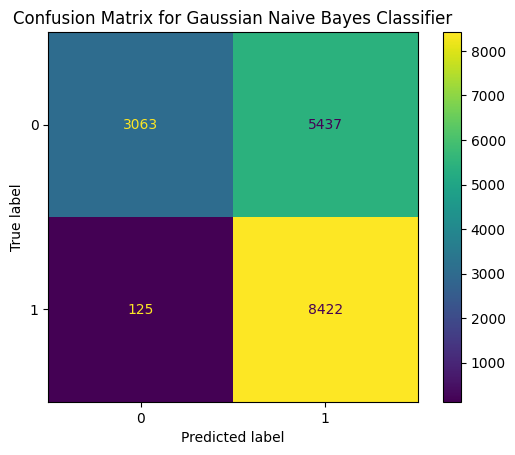

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display confusion matrix
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_clf.classes_)
disp_nb.plot()
plt.title('Confusion Matrix for Gaussian Naive Bayes Classifier')
plt.show()


**Ridge Classifier**

Confusion Matrix:
 [[6168 2332]
 [1467 7080]]
Accuracy: 0.7771455388044817
ROC AUC Score: 0.8512847851671381
Precision: 0.7522311942201445
Recall: 0.8283608283608284
F1 Score: 0.7884626092766859
MCC: 0.55704051352357
FPR: 0.2743529411764706
FNR: 0.17163917163917164
NLR (%): 23.653258089055754
PLR (%): 303.60205831903943


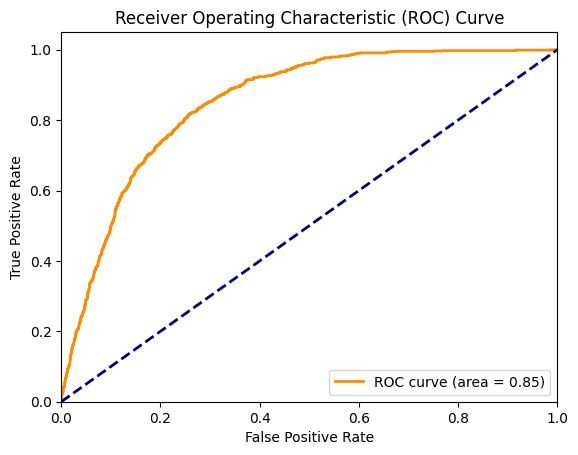

In [68]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# Create the classifier object
ridge_clf = RidgeClassifier()

# Training the classifier
ridge_clf.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_ridge = ridge_clf.predict(X_test)

# Ridge classifier does not output probabilities directly, so we cannot compute roc_auc_score directly.
# But we can use decision_function to get confidence scores and then use these scores to compute roc_auc_score.
y_pred_prob_ridge = ridge_clf.decision_function(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_ridge)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ridge)
precision = precision_score(y_test, y_pred_ridge)
recall = recall_score(y_test, y_pred_ridge)
f1 = f1_score(y_test, y_pred_ridge)
mcc = matthews_corrcoef(y_test, y_pred_ridge)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_ridge))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_ridge)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



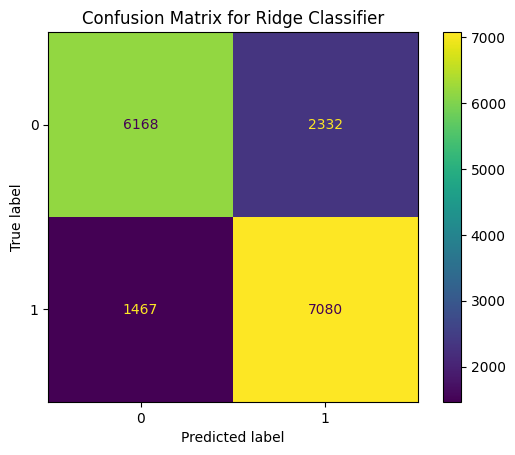

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for Ridge Classifier
cm_ridge = confusion_matrix(y_test, y_pred_ridge)

# Display confusion matrix
disp_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_ridge, display_labels=ridge_clf.classes_)
disp_ridge.plot()
plt.title('Confusion Matrix for Ridge Classifier')
plt.show()


**CatBoost Classifier**

Confusion Matrix:
 [[8145  355]
 [   0 8547]]
Accuracy: 0.9791752214465889
ROC AUC Score: 0.9977790487202253
Precision: 0.9601213210514491
Recall: 1.0
F1 Score: 0.9796549945555619
MCC: 0.9591778440239116
FPR: 0.04176470588235294
FNR: 0.0
NLR (%): 0.0
PLR (%): 2407.605633802817


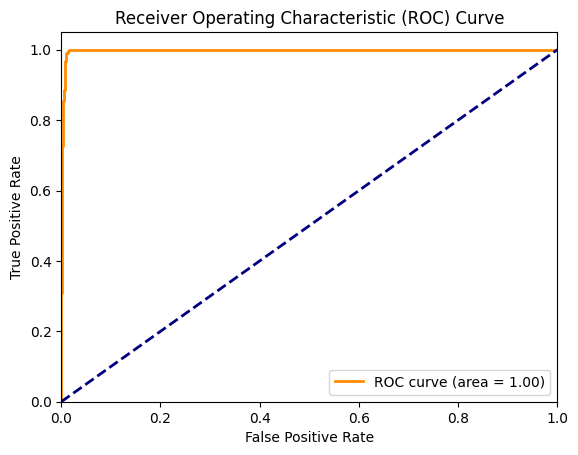

In [72]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# Create the CatBoost classifier object
catboost_clf = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=False)

# Training the classifier
catboost_clf.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=False)

# Predicting result using the test dataset
y_pred_catboost = catboost_clf.predict(X_test)
y_pred_prob_catboost = catboost_clf.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_catboost)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_catboost)
precision = precision_score(y_test, y_pred_catboost)
recall = recall_score(y_test, y_pred_catboost)
f1 = f1_score(y_test, y_pred_catboost)
mcc = matthews_corrcoef(y_test, y_pred_catboost)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_catboost))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_catboost)
roc_auc = roc_auc_score(y_test, y_pred_prob_catboost)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



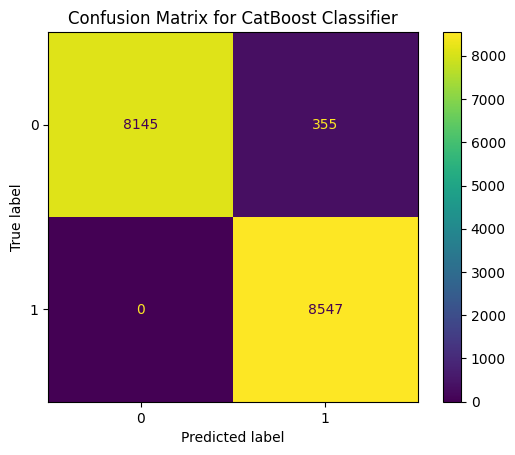

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained the model and obtained predictions y_test and y_pred_catboost

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_catboost)

# Display confusion matrix
disp_catboost = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=catboost_clf.classes_)
disp_catboost.plot()
plt.title('Confusion Matrix for CatBoost Classifier')
plt.show()

**LightGBM Classifier**

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34070, number of negative: 34117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 68187, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499655 -> initscore=-0.001379
[LightGBM] [Info] Start training from score -0.001379
Confusion Matrix:
 [[7192 1308]
 [  89 8458]]
Accuracy: 0.9180500967912243
ROC AUC Score: 0.9643706563706563
Precision: 0.8660659430677862
Recall: 0.9895869895869895
F1 Score: 0.9237153934363567
MCC: 0.8447248124053685
FPR: 0.15388235294117647
FNR: 0.010413010413010413
NLR (%): 1.230681152816859
PLR (%): 646.6360856269114


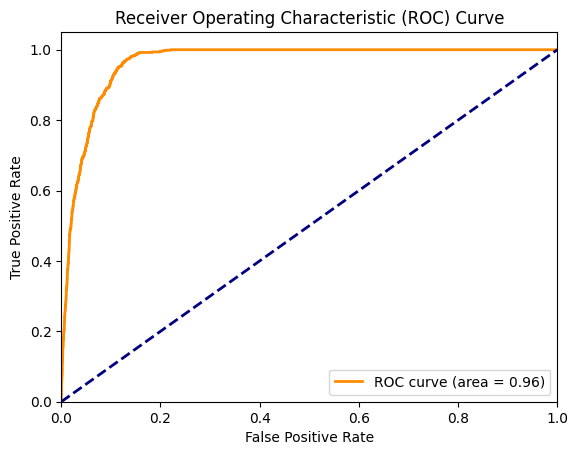

In [74]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# Create the LightGBM classifier object
lgb_classifier = lgb.LGBMClassifier()

# Training the classifier
lgb_classifier.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_lgb = lgb_classifier.predict(X_test)
y_pred_prob_lgb = lgb_classifier.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lgb)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_lgb)
precision = precision_score(y_test, y_pred_lgb)
recall = recall_score(y_test, y_pred_lgb)
f1 = f1_score(y_test, y_pred_lgb)
mcc = matthews_corrcoef(y_test, y_pred_lgb)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_lgb))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lgb)
roc_auc = roc_auc_score(y_test, y_pred_prob_lgb)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



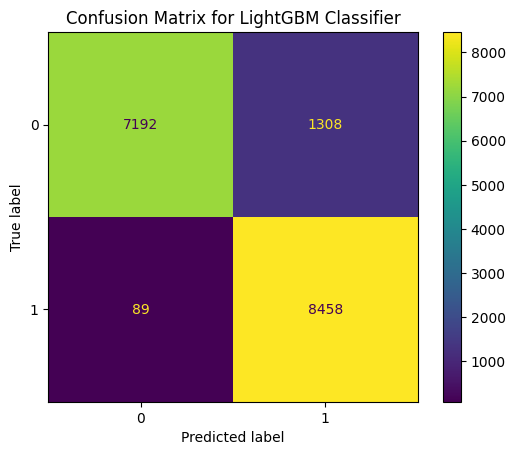

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained the model and obtained predictions y_test and y_pred_lgb

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lgb)

# Display confusion matrix
disp_lgb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=lgb_classifier.classes_)
disp_lgb.plot()
plt.title('Confusion Matrix for LightGBM Classifier')
plt.show()


**AdaBoost Classifier**

Confusion Matrix:
 [[6192 2308]
 [1346 7201]]
Accuracy: 0.7856514342699595
ROC AUC Score: 0.8638222011163188
Precision: 0.757282574403197
Recall: 0.8425178425178426
F1 Score: 0.7976295968099247
MCC: 0.5748415256306069
FPR: 0.2715294117647059
FNR: 0.1574821574821575
NLR (%): 21.61819022284139
PLR (%): 312.00173310225307


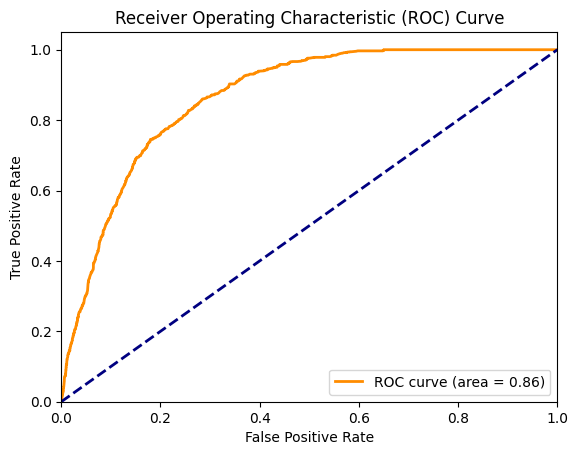

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# Create the AdaBoost classifier object
adaboost_clf = AdaBoostClassifier()

# Training the classifier
adaboost_clf.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_adaboost = adaboost_clf.predict(X_test)
y_pred_prob_adaboost = adaboost_clf.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_adaboost)
precision = precision_score(y_test, y_pred_adaboost)
recall = recall_score(y_test, y_pred_adaboost)
f1 = f1_score(y_test, y_pred_adaboost)
mcc = matthews_corrcoef(y_test, y_pred_adaboost)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_adaboost))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_adaboost)
roc_auc = roc_auc_score(y_test, y_pred_prob_adaboost)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



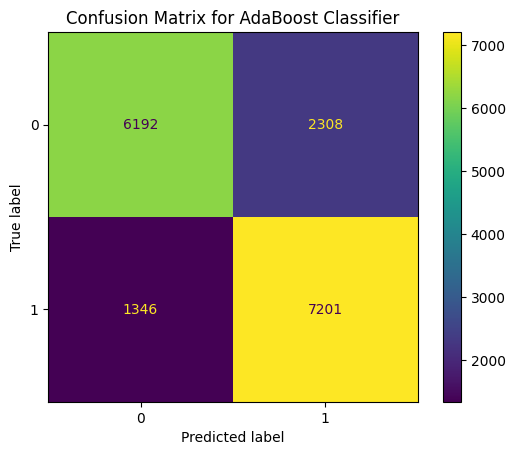

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained the model and obtained predictions y_test and y_pred_adaboost

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_adaboost)

# Display confusion matrix
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=adaboost_clf.classes_)
disp_adaboost.plot()
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()


**Bagging Classifier**

Confusion Matrix:
 [[8256  244]
 [   0 8547]]
Accuracy: 0.9856866310787822
ROC AUC Score: 0.9902941176470588
Precision: 0.9722443408030941
Recall: 1.0
F1 Score: 0.9859268658438113
MCC: 0.9717691130807191
FPR: 0.028705882352941175
FNR: 0.0
NLR (%): 0.0
PLR (%): 3502.8688524590166


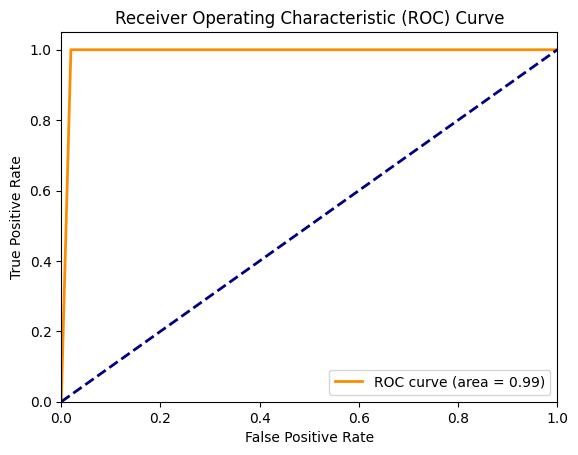

In [78]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# Create the base classifier object (e.g., KNN)
base_classifier = KNeighborsClassifier(n_neighbors=2)

# Create the Bagging Classifier object
# You can specify the number of base classifiers (n_estimators) and other parameters as needed
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)

# Training the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_bagging = bagging_classifier.predict(X_test)
y_pred_prob_bagging = bagging_classifier.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bagging)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_bagging)
precision = precision_score(y_test, y_pred_bagging)
recall = recall_score(y_test, y_pred_bagging)
f1 = f1_score(y_test, y_pred_bagging)
mcc = matthews_corrcoef(y_test, y_pred_bagging)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_bagging))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_bagging)
roc_auc = roc_auc_score(y_test, y_pred_prob_bagging)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



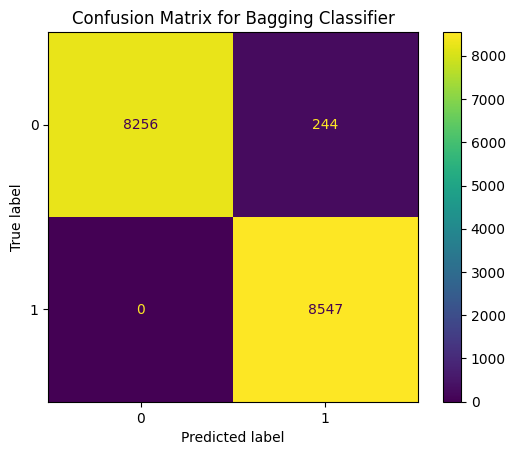

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained the model and obtained predictions y_test and y_pred_bagging

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bagging)

# Display confusion matrix
disp_bagging = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=bagging_classifier.classes_)
disp_bagging.plot()
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()


**Extra Trees Classifier**

Confusion Matrix:
 [[8466   34]
 [   0 8547]]
Accuracy: 0.9980055141667156
ROC AUC Score: 1.0
Precision: 0.9960377578370819
Recall: 1.0
F1 Score: 0.9980149462867819
MCC: 0.9960188787396219
FPR: 0.004
FNR: 0.0
NLR (%): 0.0
PLR (%): 25138.235294117647


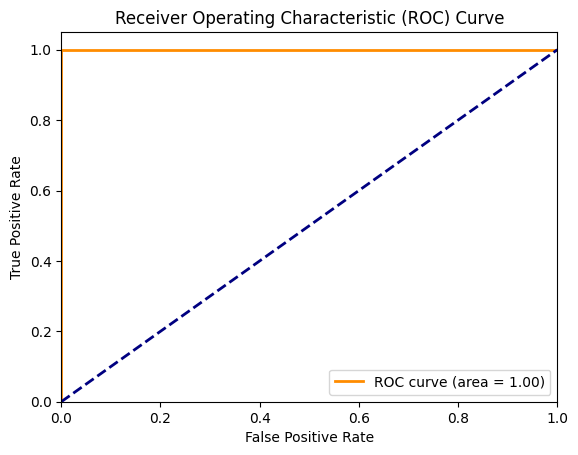

In [80]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt

# Create the classifier object
extra_trees = ExtraTreesClassifier()

# Training the classifier
extra_trees.fit(X_train, y_train)

# Predicting result using the test dataset
y_pred_extra_trees = extra_trees.predict(X_test)
y_pred_prob_extra_trees = extra_trees.predict_proba(X_test)[:, 1]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_extra_trees)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_extra_trees)
precision = precision_score(y_test, y_pred_extra_trees)
recall = recall_score(y_test, y_pred_extra_trees)
f1 = f1_score(y_test, y_pred_extra_trees)
mcc = matthews_corrcoef(y_test, y_pred_extra_trees)

# Calculate True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate False Positive Rate (FPR) and False Negative Rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Calculate Negative Likelihood Ratio (NLR) and Positive Likelihood Ratio (PLR) in percent
if fpr == 0:
    nlr = 0
else:
    nlr = fnr / (1 - fpr) * 100

if fp == 0:
    plr = float('inf')
else:
    plr = (tp / fp) * 100

# Print evaluation metrics
print('Confusion Matrix:\n', conf_matrix)
print('Accuracy:', accuracy)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_extra_trees))
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('MCC:', mcc)
print('FPR:', fpr)
print('FNR:', fnr)
print('NLR (%):', nlr)
print('PLR (%):', plr)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_extra_trees)
roc_auc = roc_auc_score(y_test, y_pred_prob_extra_trees)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


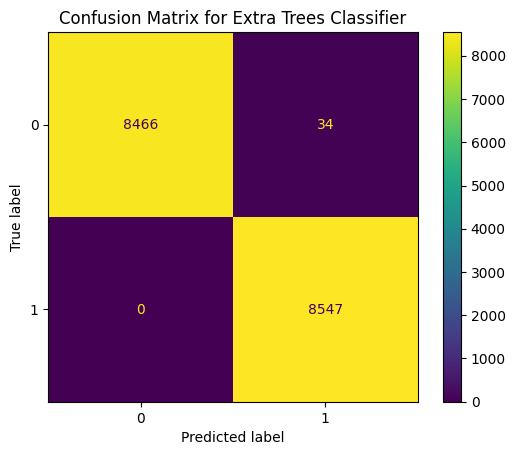

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained the model and obtained predictions y_test and y_pred_extra_trees

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_extra_trees)

# Display confusion matrix
disp_extra_trees = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=extra_trees.classes_)
disp_extra_trees.plot()
plt.title('Confusion Matrix for Extra Trees Classifier')
plt.savefig('confusion_matrix_extra_trees.png')  # Save the plot to a file
plt.show()


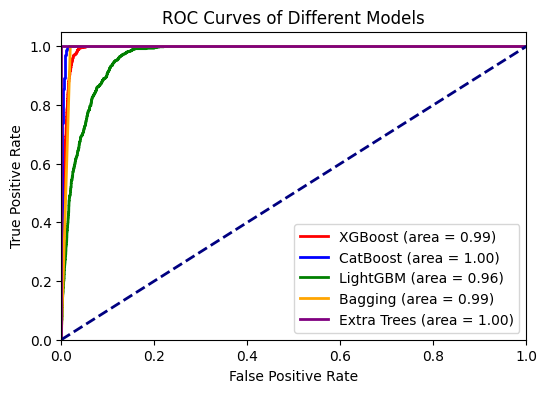

In [82]:
# Plot ROC curves for all models
plt.figure(figsize=(6, 4))

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_xgb))

# CatBoost
fpr_cat, tpr_cat, _ = roc_curve(y_test, y_pred_prob_catboost)
plt.plot(fpr_cat, tpr_cat, color='blue', lw=2, label='CatBoost (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_catboost))

# LightGBM
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_pred_prob_lgb)
plt.plot(fpr_lgb, tpr_lgb, color='green', lw=2, label='LightGBM (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_lgb))

# Bagging
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_pred_prob_bagging)
plt.plot(fpr_bag, tpr_bag, color='orange', lw=2, label='Bagging (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_bagging))

# Extra Trees
fpr_extra, tpr_extra, _ = roc_curve(y_test, y_pred_prob_extra_trees)
plt.plot(fpr_extra, tpr_extra, color='purple', lw=2, label='Extra Trees (area = %0.2f)' % roc_auc_score(y_test, y_pred_prob_extra_trees))

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Different Models')
plt.legend(loc="lower right")

# Display the plot
plt.show()
